In [1]:
import math
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# exact solution u(x) for pde
def func_u(x):
    u=(1-(x[:,0]**2)-(x[:,1]**2))/4
    return u 

# f(x) = 1
def func_f(x):
    f = 1
    return (f)

def func_g(x):
    g = 0
    return (g)

# w_val
def func_w(x):
    lens = x.shape[0]
    w_bool = torch.gt(torch.zeros(lens), 1-(x[:,0]**2+x[:,1]**2))
    w_val = torch.where(w_bool, torch.zeros(lens), 1-(x[:,0]**2+x[:,1]**2))
    return (w_val)



# define generator and discriminator neural network
class generator(torch.nn.Module):
    def __init__(self):
        super(generator,self).__init__()
        self.hidden00=torch.nn.Linear(dim, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden00.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        #torch.nn.init.constant(self.hidden00.bias, -0.5)
        self.hidden0=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden0.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden1=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden1.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden2=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden2.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden3=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden3.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden4=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden4.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden5=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden5.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden6=torch.nn.Linear(u_hidden_size, u_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden6.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.predict=torch.nn.Linear(u_hidden_size, out_size)
        torch.nn.init.kaiming_uniform_(self.predict.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        
    def forward(self, x):
        x=F.leaky_relu(self.hidden00(x))
        x=F.leaky_relu(self.hidden0(x))
        x=F.leaky_relu(self.hidden1(x))
        x=F.leaky_relu(self.hidden2(x))
        x=F.leaky_relu(self.hidden3(x))
        x=F.leaky_relu(self.hidden4(x))
        x=F.leaky_relu(self.hidden5(x))
        x=F.leaky_relu(self.hidden6(x))
        x=self.predict(x)
        return(x)

    def backward(self, retain_graph=True):
        self.loss.backward(retain_graph=retain_graph)
        return(self.loss)

class discriminator(torch.nn.Module):
    def __init__(self):
        super(discriminator,self).__init__()
        self.hidden00_v=torch.nn.Linear(dim, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden00_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden0_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden0_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden1_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden1_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden2_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden2_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden3_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden3_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden4_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden4_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden5_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden5_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.hidden6_v=torch.nn.Linear(v_hidden_size, v_hidden_size)
        torch.nn.init.kaiming_uniform_(self.hidden6_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        self.predict_v=torch.nn.Linear(v_hidden_size, out_size)
        torch.nn.init.kaiming_uniform_(self.predict_v.weight, a=0.1, mode='fan_in', nonlinearity='leaky_relu')
        
    def forward(self, x):
        x=F.leaky_relu(self.hidden00_v(x))
        x=F.leaky_relu(self.hidden0_v(x))
        x=F.leaky_relu(self.hidden1_v(x))
        x=F.leaky_relu(self.hidden2_v(x))
        x=F.leaky_relu(self.hidden3_v(x))
        x=F.leaky_relu(self.hidden4_v(x))
        x=F.leaky_relu(self.hidden5_v(x))
        x=F.leaky_relu(self.hidden6_v(x))
        x=self.predict_v(x)
        return(x)

    def backward(self, retain_graph=True):
        self.loss.backward(retain_graph=retain_graph)
        return(self.loss)



# grad_u
def grad_u(y_output_u):
    optimizer_u_0.zero_grad()
    lens = x_domain.shape[0]
    y_output_u.backward(torch.ones([lens,1]), retain_graph=True)
    grad_u = x_domain_.grad
    return(grad_u)  

# grad_phi
def grad_phi(y_output_v):
    optimizer_v_0.zero_grad()
    lens = x_domain.shape[0]
    w = torch.reshape(func_w(x_domain), (lens, 1))
    phi = y_output_v.mul(w)
    y_output_v.backward(torch.ones([lens, 1]), retain_graph=True)
    grad_phi = x_domain_.grad
    return (grad_phi)



# loss function
def I(y_output_u, y_output_v):
    temp_grad_u=grad_u(y_output_u)
    t1 = torch.sum(torch.mm(torch.transpose(temp_grad_u,0,1),grad_phi(y_output_v)))
    t = torch.sum(func_f(x_domain)*y_output_v)
    I = t1-t
    return(I)

def L_int(y_output_u, y_output_v):
    numerator = torch.log(torch.abs(I(y_output_u, y_output_v))**2)
    denominator = torch.log(torch.sum((y_output_v)**2)) 
    ratio=numerator-denominator
    return(ratio)

def L_bd():
    result = torch.mean((net_u(x_boundary_)-func_g(x_boundary))**2)
    return(result)

def Loss_u(y_output_u, y_output_v):
    return(L_int(y_output_u, y_output_v)+alpha*L_bd())

def Loss_v(y_output_u,y_output_v):
    return(-L_int(y_output_u, y_output_v))


In [4]:
# initial parameters(modified***)
up= 1.0
low= -1
dim= 2
mesh_size= 200
domain_size= 200
bound_size= 500
#
v_layer= 6
v_hidden_size= 20
v_step= 1       
v_rate=0.00015   
u_layer= 6
u_hidden_size= 20
u_step= 1
u_rate=0.00015
out_size=1
alpha=100



# x value in domain and boundary
# x_boundary
x_boundary_list=[]  #x_boundry
x_bound_1 = torch.Tensor(bound_size,1).uniform_(low,up)
x_bound_2 = torch.sqrt(1-x_bound_1**2)
x_bound_3 = -torch.sqrt(1-x_bound_1**2)
x_bound_4 = torch.Tensor(bound_size,1).uniform_(low,up)
x_bound_5 = torch.sqrt(1-x_bound_4**2)
x_bound_6 = -torch.sqrt(1-x_bound_4**2)
#
x_boundary_list.append(torch.cat((x_bound_1,x_bound_2),1))
x_boundary_list.append(torch.cat((x_bound_1,x_bound_3),1))
x_boundary_list.append(torch.cat((x_bound_5,x_bound_4),1))
x_boundary_list.append(torch.cat((x_bound_6,x_bound_4),1))
x_boundary = torch.cat((x_boundary_list[0],x_boundary_list[1], x_boundary_list[2], x_boundary_list[3]),0)



# x value for domain
x_mesh2=torch.linspace(low,up,domain_size)
y_mesh2=torch.linspace(low,up,domain_size)
mesh3,mesh4=torch.meshgrid(x_mesh2,y_mesh2)
x2=torch.reshape(mesh3,(-1,1))
y2=torch.reshape(mesh4,(-1,1))
x_domain0=torch.cat((x2,y2),1)
#
lens_x_domain0 = x_domain0.shape[0]
mask = torch.lt(torch.square(x_domain0[:,0])+torch.square(x_domain0[:,1]), torch.ones(lens_x_domain0))
x_domain1=torch.masked_select(x_domain0[:,0],mask)
x_domain2=torch.masked_select(x_domain0[:,1],mask)
x_domain1_=torch.reshape(x_domain1,(-1,1))
x_domain2_=torch.reshape(x_domain2,(-1,1))
x_domain=torch.cat((x_domain1_,x_domain2_),1)


# x value for network input
x_mesh = torch.linspace(low,up,mesh_size)
y_mesh = torch.Tensor(mesh_size,mesh_size)
for i in range(mesh_size):
    neg=-torch.sqrt(1-x_mesh[i]**2)
    pos=torch.sqrt(1-x_mesh[i]**2)
    y_mesh[i,:]=torch.linspace(neg.data.float(),pos.data.float(),mesh_size)
mesh1,mesh2=torch.meshgrid(x_mesh,x_mesh)
x_mesh_ = torch.reshape(mesh1,(-1,1))
y_mesh_ = torch.reshape(y_mesh,(-1,1))
x_test = torch.cat((x_mesh_,y_mesh_),1)


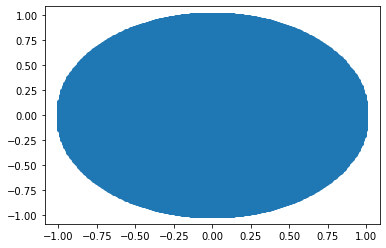

In [5]:
plt.scatter(x_domain[:,0],x_domain[:,1])

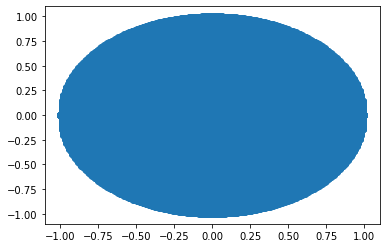

In [6]:
plt.scatter(x_test[:,0],x_test[:,1])

In [7]:
# torch variables
x_test_ = Variable(x_test)
x_test_.requires_grad_(True)
x_domain_=Variable(x_domain)
x_domain_.requires_grad_(True)
x_boundary_ = Variable(x_boundary)
u_test = func_u(x_test)
u_test_ = Variable(u_test)


# neural network models
net_u= generator()
net_v=discriminator()

# optimizers for grad_u and grad_phi
optimizer_u_0 = torch.optim.SGD(net_u.parameters(), lr = 0)
optimizer_v_0 = torch.optim.SGD(net_v.parameters(), lr = 0)

#optimizers for WAN
optimizer_u = torch.optim.Adam(net_u.parameters(), lr = u_rate) 
optimizer_v = torch.optim.Adam(net_v.parameters(), lr = v_rate)
# learning rate decays when loss doesn't change in 10 iterations
#scheduler_u = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_u, mode='max', factor=0.6, patience=150, verbose=False, threshold=1e-04, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)
#scheduler_v = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_v, mode='min', factor=0.6, patience=150, verbose=False, threshold=1e-04, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

#scheduler_u=torch.optim.lr_scheduler.StepLR(optimizer_u, step_size=600, gamma=0.6, last_epoch=-1)  #每一个iteration实际是20个epoch
#scheduler_v=torch.optim.lr_scheduler.StepLR(optimizer_v, step_size=600, gamma=0.6, last_epoch=-1)

In [8]:
iteration = 501
n1 = 10
n2 = 10

prediction_u_ = net_u(x_domain_)
prediction_v_ = net_v(x_domain_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u_, prediction_v_)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u_ = net_u(x_domain_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u_,prediction_v_)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v_ = net_v(x_domain_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(330.2850, grad_fn=<AddBackward0>) tensor(-27.8691, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(43.4133, grad_fn=<AddBackward0>) tensor(-41.4837, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(45.2259, grad_fn=<AddBackward0>) tensor(-45.2159, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(47.5043, grad_fn=<AddBackward0>) tensor(-47.5513, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(49.0378, grad_fn=<AddBackward0>) tensor(-49.0334, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(50.2831, grad_fn=<AddBackward0>) tensor(-50.2231, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(51.2197, grad_fn=<AddBackward0>) tensor(-51.2408, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(52.0186, grad_fn=<AddBackward0>) tensor(-52.0382, grad_fn=<NegBackward>)
第70个epoch的学习率：0.

(array([3.03327600e+06, 2.00439120e+07, 5.07107040e+07, 8.56870880e+07,
        1.22330680e+08, 1.97751704e+08, 2.16157068e+08, 1.74904410e+08,
        8.85973060e+07, 5.75594800e+06]),
 array([-0.40486902, -0.3286885 , -0.25250795, -0.17632742, -0.10014689,
        -0.02396636,  0.05221418,  0.12839471,  0.20457524,  0.28075576,
         0.3569363 ], dtype=float32),
 <a list of 10 Patch objects>)

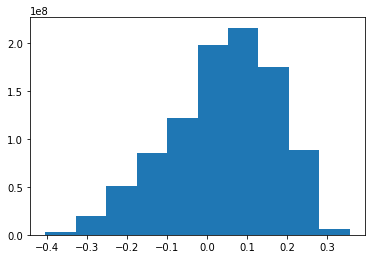

In [9]:
# the error of true solution and predicted solution
u_domain=func_u(x_domain)
error_=u_domain-prediction_u_
error_1=torch.reshape(error_,(-1,1))
plt.hist(error_1.data.numpy(),bins=10)

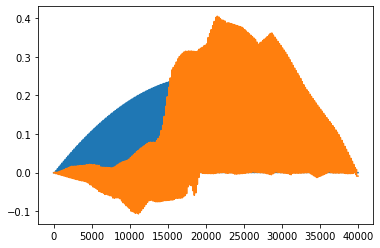

In [10]:
# using x_test to compare tru solution and predicted solution
prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

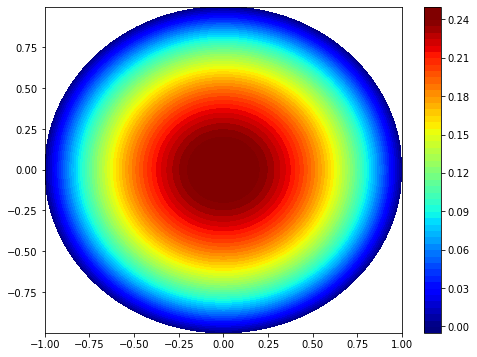

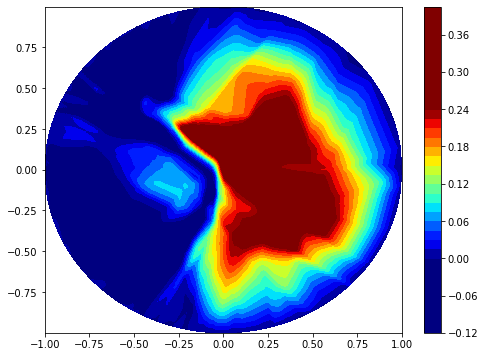

In [11]:
# 2d plot of true solution and predicted solution
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [12]:
iteration = 501
n1 = 10
n2 = 10

prediction_u_ = net_u(x_domain_)
prediction_v_ = net_v(x_domain_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u_, prediction_v_)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u_ = net_u(x_domain_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u_,prediction_v_)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v_ = net_v(x_domain_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(61.9266, grad_fn=<AddBackward0>) tensor(-61.9311, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(62.0215, grad_fn=<AddBackward0>) tensor(-62.0261, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(62.1150, grad_fn=<AddBackward0>) tensor(-62.1195, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(62.2062, grad_fn=<AddBackward0>) tensor(-62.2104, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(62.2954, grad_fn=<AddBackward0>) tensor(-62.2994, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(62.3826, grad_fn=<AddBackward0>) tensor(-62.3865, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(62.4684, grad_fn=<AddBackward0>) tensor(-62.4730, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(62.5530, grad_fn=<AddBackward0>) tensor(-62.5570, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

(array([2.59397200e+06, 1.78142060e+07, 4.91526170e+07, 8.51730450e+07,
        1.27203298e+08, 2.06071528e+08, 2.17063586e+08, 1.73162878e+08,
        8.20214860e+07, 4.71548000e+06]),
 array([-0.39843112, -0.32254696, -0.24666281, -0.17077866, -0.09489451,
        -0.01901035,  0.05687381,  0.13275796,  0.20864211,  0.28452626,
         0.36041042], dtype=float32),
 <a list of 10 Patch objects>)

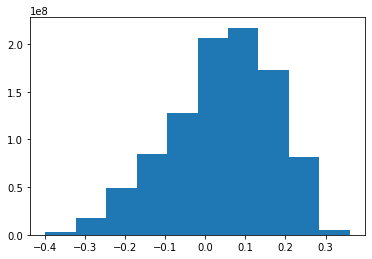

In [13]:
# the error of true solution and predicted solution
u_domain=func_u(x_domain)
error_=u_domain-prediction_u_
error_1=torch.reshape(error_,(-1,1))
plt.hist(error_1.data.numpy(),bins=10)

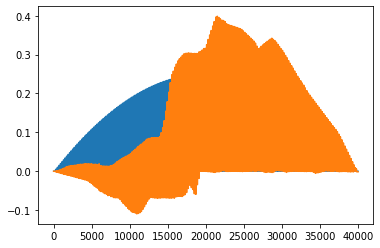

In [15]:
# using x_test to compare tru solution and predicted solution
prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

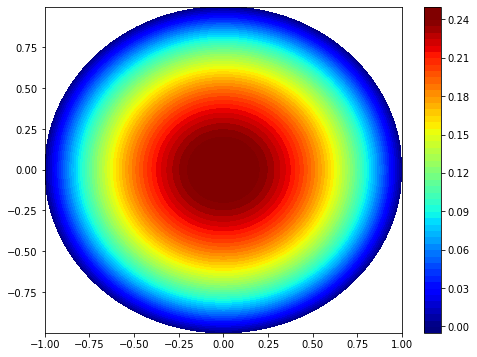

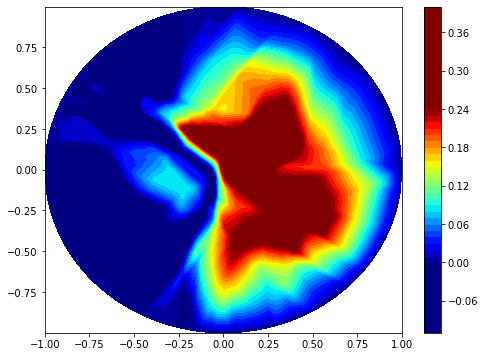

In [16]:
# 2d plot of true solution and predicted solution
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [17]:
iteration = 1001
n1 = 10
n2 = 10

prediction_u_ = net_u(x_domain_)
prediction_v_ = net_v(x_domain_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u_, prediction_v_)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u_ = net_u(x_domain_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u_,prediction_v_)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v_ = net_v(x_domain_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(65.2036, grad_fn=<AddBackward0>) tensor(-65.2061, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(65.2501, grad_fn=<AddBackward0>) tensor(-65.2528, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(65.2966, grad_fn=<AddBackward0>) tensor(-65.2985, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(65.3417, grad_fn=<AddBackward0>) tensor(-65.3437, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(65.3869, grad_fn=<AddBackward0>) tensor(-65.3886, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(65.4314, grad_fn=<AddBackward0>) tensor(-65.4340, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(65.4756, grad_fn=<AddBackward0>) tensor(-65.4781, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(65.5201, grad_fn=<AddBackward0>) tensor(-65.5223, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

(array([1.91608000e+06, 1.40658560e+07, 4.36326620e+07, 8.08596230e+07,
        1.27007759e+08, 2.11409420e+08, 2.19527556e+08, 1.75635548e+08,
        8.48111120e+07, 6.10648000e+06]),
 array([-0.39063436, -0.31583962, -0.24104486, -0.16625012, -0.09145538,
        -0.01666063,  0.05813412,  0.13292886,  0.2077236 ,  0.28251836,
         0.3573131 ], dtype=float32),
 <a list of 10 Patch objects>)

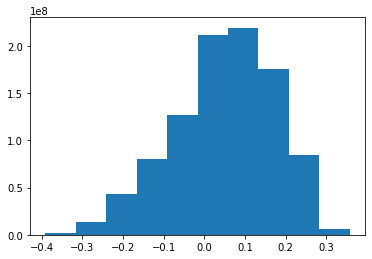

In [18]:
# the error of true solution and predicted solution
u_domain=func_u(x_domain)
error_=u_domain-prediction_u_
error_1=torch.reshape(error_,(-1,1))
plt.hist(error_1.data.numpy(),bins=10)

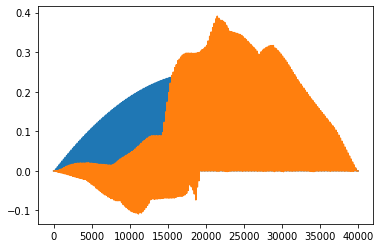

In [19]:
# using x_test to compare tru solution and predicted solution
prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

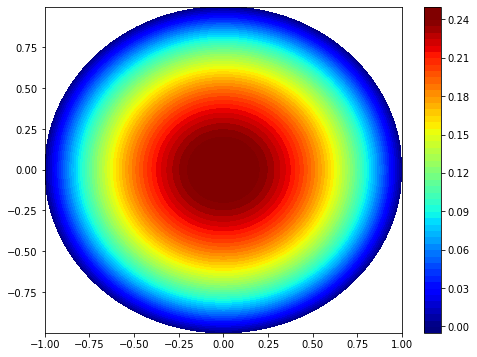

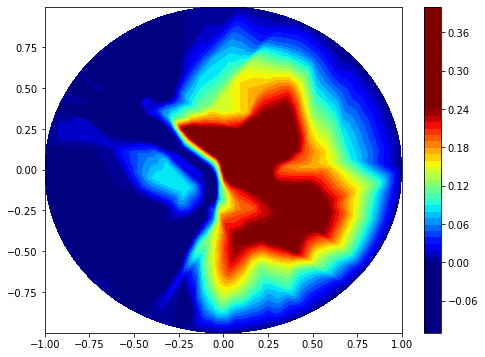

In [20]:
# 2d plot of true solution and predicted solution
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [21]:
iteration = 1001
n1 = 10
n2 = 10

prediction_u_ = net_u(x_domain_)
prediction_v_ = net_v(x_domain_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u_, prediction_v_)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u_ = net_u(x_domain_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u_,prediction_v_)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v_ = net_v(x_domain_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(68.4163, grad_fn=<AddBackward0>) tensor(-68.4171, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(68.4393, grad_fn=<AddBackward0>) tensor(-68.4402, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(68.4625, grad_fn=<AddBackward0>) tensor(-68.4631, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(68.4847, grad_fn=<AddBackward0>) tensor(-68.4857, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(68.5073, grad_fn=<AddBackward0>) tensor(-68.5088, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(68.5299, grad_fn=<AddBackward0>) tensor(-68.5309, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(68.5516, grad_fn=<AddBackward0>) tensor(-68.5534, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(68.5742, grad_fn=<AddBackward0>) tensor(-68.5750, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

(array([2.18634400e+06, 1.43509680e+07, 4.42977360e+07, 8.20465830e+07,
        1.28962230e+08, 2.15449248e+08, 2.16244935e+08, 1.72883572e+08,
        8.25873320e+07, 5.96314800e+06]),
 array([-0.37980753, -0.30620182, -0.2325961 , -0.15899037, -0.08538465,
        -0.01177894,  0.06182678,  0.1354325 ,  0.20903823,  0.28264394,
         0.35624966], dtype=float32),
 <a list of 10 Patch objects>)

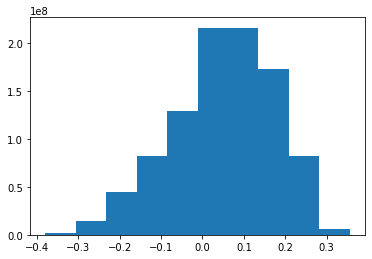

In [22]:
# the error of true solution and predicted solution
u_domain=func_u(x_domain)
error_=u_domain-prediction_u_
error_1=torch.reshape(error_,(-1,1))
plt.hist(error_1.data.numpy(),bins=10)

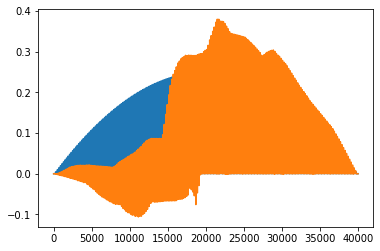

In [24]:
# using x_test to compare tru solution and predicted solution
prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

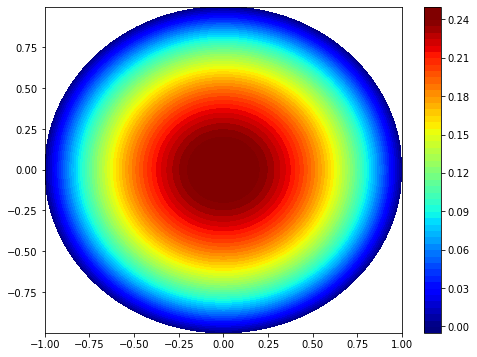

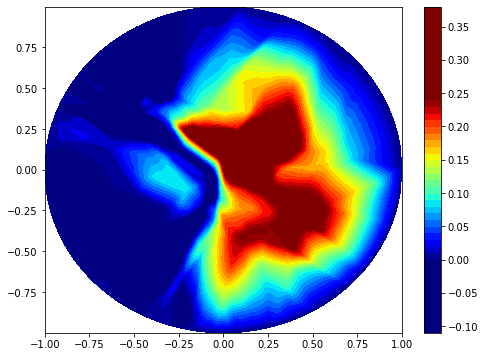

In [26]:
# 2d plot of true solution and predicted solution
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

In [27]:
iteration = 1001
n1 = 10
n2 = 10

prediction_u_ = net_u(x_domain_)
prediction_v_ = net_v(x_domain_)

for t in range(iteration):
    
        
    for i in range(n1):
        loss_u = Loss_u(prediction_u_, prediction_v_)
        optimizer_u.zero_grad()
        loss_u.backward(retain_graph=True)
        optimizer_u.step()
        #scheduler_u.step() #loss_u
        prediction_u_ = net_u(x_domain_)
        
    
    for j in range(n2):
        loss_v = Loss_v(prediction_u_,prediction_v_)
        optimizer_v.zero_grad()
        loss_v.backward(retain_graph=True)
        optimizer_v.step()
        #scheduler_v.step() #loss_v
        prediction_v_ = net_v(x_domain_)
            

    if t%10==0:
        print(t, loss_u, loss_v)
        print('第%d个epoch的学习率：%f'%(t, optimizer_u.param_groups[0]['lr']))
        print('第%d个epoch的学习率：%f'%(t, optimizer_v.param_groups[0]['lr']))

0 tensor(70.2697, grad_fn=<AddBackward0>) tensor(-70.2716, grad_fn=<NegBackward>)
第0个epoch的学习率：0.000150
第0个epoch的学习率：0.000150
10 tensor(70.2875, grad_fn=<AddBackward0>) tensor(-70.2853, grad_fn=<NegBackward>)
第10个epoch的学习率：0.000150
第10个epoch的学习率：0.000150
20 tensor(70.3024, grad_fn=<AddBackward0>) tensor(-70.2976, grad_fn=<NegBackward>)
第20个epoch的学习率：0.000150
第20个epoch的学习率：0.000150
30 tensor(70.3211, grad_fn=<AddBackward0>) tensor(-70.3149, grad_fn=<NegBackward>)
第30个epoch的学习率：0.000150
第30个epoch的学习率：0.000150
40 tensor(70.3330, grad_fn=<AddBackward0>) tensor(-70.3289, grad_fn=<NegBackward>)
第40个epoch的学习率：0.000150
第40个epoch的学习率：0.000150
50 tensor(70.3530, grad_fn=<AddBackward0>) tensor(-70.3422, grad_fn=<NegBackward>)
第50个epoch的学习率：0.000150
第50个epoch的学习率：0.000150
60 tensor(70.3663, grad_fn=<AddBackward0>) tensor(-70.3559, grad_fn=<NegBackward>)
第60个epoch的学习率：0.000150
第60个epoch的学习率：0.000150
70 tensor(70.3783, grad_fn=<AddBackward0>) tensor(-70.3782, grad_fn=<NegBackward>)
第70个epoch的学习率：0.0

(array([2.11818400e+06, 1.36253930e+07, 4.31870430e+07, 8.13396230e+07,
        1.28097833e+08, 2.16346312e+08, 2.15502574e+08, 1.73042372e+08,
        8.53894340e+07, 6.32332800e+06]),
 array([-0.37458903, -0.30182606, -0.22906308, -0.15630011, -0.08353714,
        -0.01077417,  0.06198881,  0.13475178,  0.20751475,  0.28027773,
         0.3530407 ], dtype=float32),
 <a list of 10 Patch objects>)

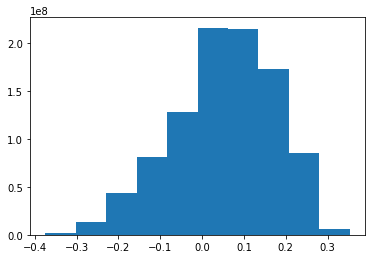

In [28]:
# the error of true solution and predicted solution
u_domain=func_u(x_domain)
error_=u_domain-prediction_u_
error_1=torch.reshape(error_,(-1,1))
plt.hist(error_1.data.numpy(),bins=10)

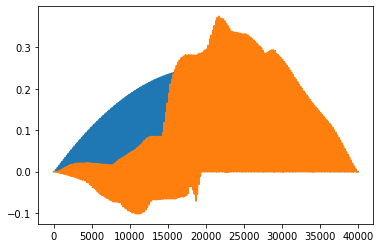

In [29]:
# using x_test to compare tru solution and predicted solution
prediction_u = net_u(x_test_)
prediction_v = net_v(x_test_)

plt.plot(u_test_.data.numpy())
plt.plot(prediction_u.data.numpy())

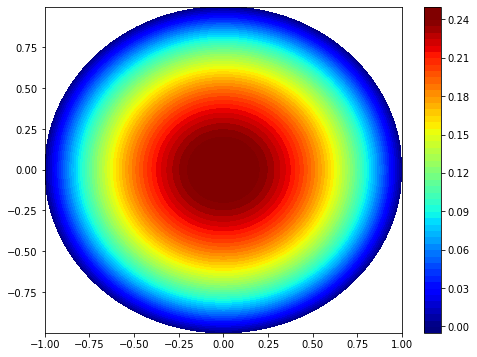

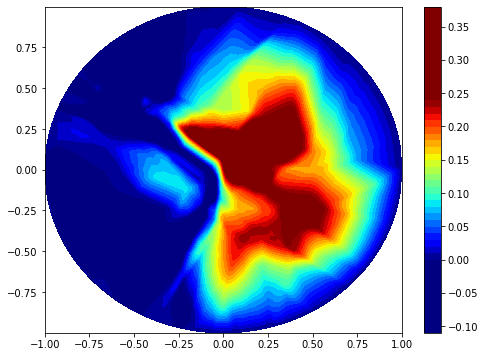

In [30]:
# 2d plot of true solution and predicted solution
test_u_=torch.reshape(u_test,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), test_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色条
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()

prediciton_u_=torch.reshape(prediction_u.data,(mesh_size,mesh_size))
#设置打开画布大小,长8，宽6
plt.figure(figsize=(8,6))
#填充颜色，f即filled
cset=plt.contourf(mesh1.data.numpy(), y_mesh.data.numpy(), prediciton_u_.data.numpy(), 50, cmap="jet")
#画等高线
#plt.contour(x1,x2,test_u_,50)
#设置颜色
plt.clim(0.00, 0.24)
plt.colorbar(cset)
plt.show()